In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('wbBD/wb_bd_clean.csv', index_col='Year')
ind_df = pd.read_csv('wbBD/indicators.csv', index_col='INDICATOR_CODE')
indicator = ind_df['INDICATOR_NAME']

In [4]:
inf_df = df[['NY.GDP.DEFL.KD.ZG', 'FP.CPI.TOTL.ZG']].dropna()
inf_df.index = pd.to_datetime(inf_df.index)

In [5]:
inf_df.rename(columns={'NY.GDP.DEFL.KD.ZG':'GDP Deflator', 'FP.CPI.TOTL.ZG':'Consuper Price'}, inplace=True)

In [6]:
decade = inf_df['2010':]

In [7]:
years = decade.index.strftime("%Y")
x = np.arange(len(years))
gdp = decade['GDP Deflator']
cpi = decade['Consuper Price']

In [8]:
width = .35

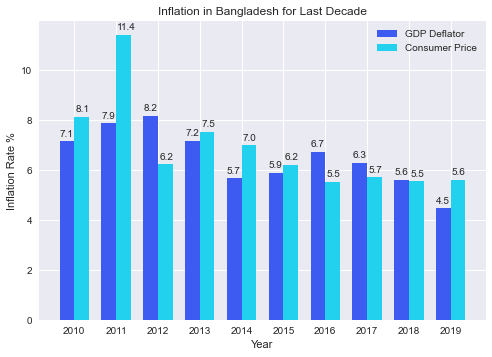

In [44]:
plt.bar(x-(width/2), gdp, width=width, color='#3d5af1', label='GDP Deflator')
plt.bar(x+(width/2), cpi, width=width, color='#22d1ee', label='Consumer Price')
plt.title('Inflation in Bangladesh for Last Decade')
plt.ylabel('Inflation Rate %')
plt.xlabel('Year')
plt.legend()
plt.xticks(ticks=x, labels=years)
#the following two iterations add values of each bar on top of the bar
for ind, val in enumerate(cpi):
    plt.text(x=ind+.03, y=val+.3, va='center', s=f'{round(val,1)}')
for ind, val in enumerate(gdp):
    plt.text(x=ind-.35, y=val+.30, va='center', s=f'{round(val,1)}')
plt.show()